# Librarys

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("dataset.csv", parse_dates=None)

In [ ]:
df.head()

,id,age,monthly_income,collateral_value,loan_amount,city,state,collateral_debt,verified_restriction,dishonored_checks,expired_debts,banking_debts,commercial_debts,protests,marital_status,informed_restriction,loan_term,monthly_payment,informed_purpose,auto_brand,auto_model,auto_year,pre_approved,form_completed,sent_to_analysis,channel,zip_code,landing_page,landing_page_product,gender,utm_term,education_level
0,100001025857,61.0,1300.0,NaN,10000.0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Ford,GOL,2010.0,0.0,1.0,0.0,NaN,5754XXXX,NaN,NaN,male,NaN,NaN
1,173466,50.0,3500.0,40000.0,23936.0,Muriaé,MG,NaN,1.0,0,0,1,0,0,NaN,1.0,NaN,813.00,"pagar custos de escrituras de terreno , cartão...",GM - Chevrolet,SPIN LT 1.8 8V Econo.Flex 5p Mec.,2014.0,0.0,0.0,0.0,search,3688XXXX,/emprestimo/garantia-veiculo,AutoRefinancing,NaN,c,NaN
2,173465,31.0,2600.0,18000.0,5000.0,Araxá,MG,10000.0,0.0,0,0,0,0,0,NaN,1.0,NaN,208.33,para pagar contas,GM - Chevrolet,Corsa Sed Class.Life 1.0/1.0 FlexPower,2008.0,0.0,1.0,0.0,display,3818XXXX,/emprestimos/solicitar,PersonalLoan,male,NaN,NaN
3,173464,51.0,3600.0,21000.0,10000.0,Jaú,SP,8000.0,1.0,0,0,1,1,1,NaN,1.0,NaN,323.53,quitar o carro,Fiat,Palio 1.0 ECONOMY Fire Flex 8V 4p,2012.0,0.0,0.0,0.0,0,1720XXXX,/emprestimos/garantia-veiculo/solicitar,NaN,male,NaN,NaN
4,173463,51.0,1500.0,10000.0,8000.0,Veranópolis,RS,0.0,NaN,0,0,0,0,0,NaN,1.0,NaN,333.33,investimento,Fiat,Uno Mille EP 2p e 4p,1996.0,0.0,0.0,0.0,display,9533XXXX,/emprestimos/solicitar,PersonalLoan,male,NaN,NaN


# Description variables


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35021 entries, 0 to 35020
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35021 non-null  int64  
 1   age                   35019 non-null  float64
 2   monthly_income        35019 non-null  float64
 3   collateral_value      35000 non-null  float64
 4   loan_amount           35018 non-null  float64
 5   city                  34998 non-null  object 
 6   state                 35017 non-null  object 
 7   collateral_debt       24650 non-null  float64
 8   verified_restriction  26329 non-null  float64
 9   dishonored_checks     35021 non-null  int64  
 10  expired_debts         35021 non-null  int64  
 11  banking_debts         35021 non-null  int64  
 12  commercial_debts      35021 non-null  int64  
 13  protests              35021 non-null  int64  
 14  marital_status        415 non-null    object 
 15  informed_restrictio

In [ ]:
df.isnull().sum()

id                          0
age                         2
monthly_income              2
collateral_value           21
loan_amount                 3
city                       23
state                       4
collateral_debt         10371
verified_restriction     8692
dishonored_checks           0
expired_debts               0
banking_debts               0
commercial_debts            0
protests                    0
marital_status          34606
informed_restriction     1650
loan_term               35021
monthly_payment          1282
informed_purpose         1117
auto_brand                  9
auto_model                 11
auto_year                   4
pre_approved              173
form_completed            175
sent_to_analysis          173
channel                  1287
zip_code                    0
landing_page             1287
landing_page_product    12092
gender                   3944
utm_term                23814
education_level         15127
dtype: int64

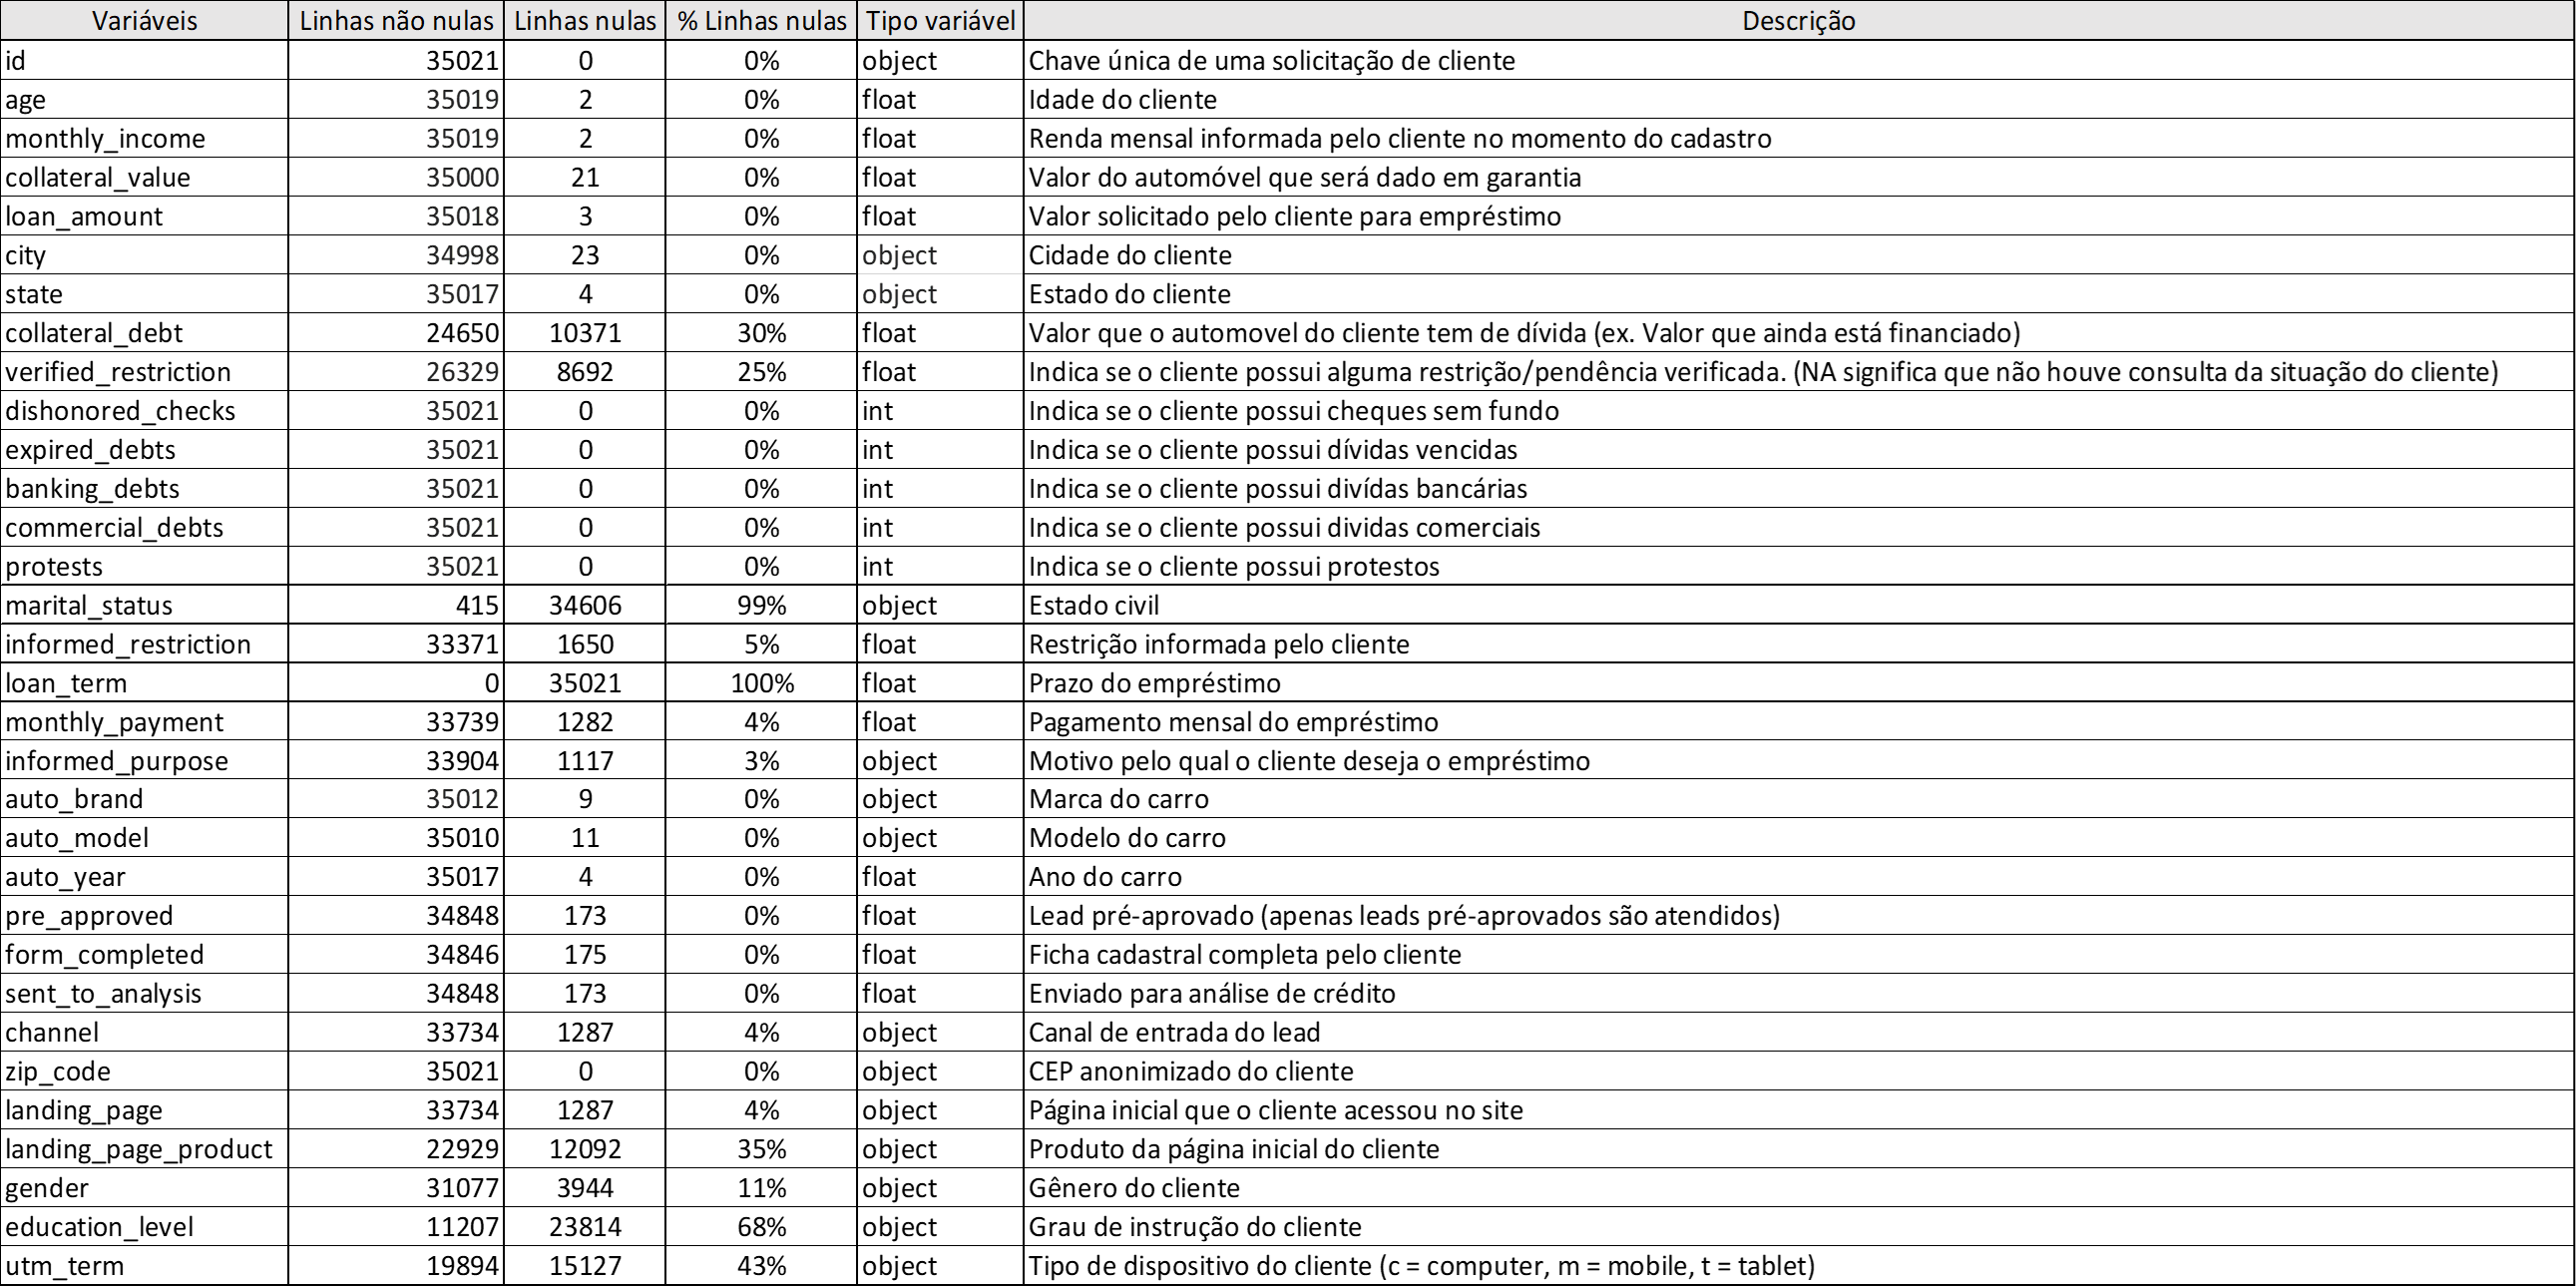

Var dependente: sent_to_analysis 

In [ ]:
df.nunique().sort_values()

loan_term                   0
informed_restriction        2
gender                      2
sent_to_analysis            2
form_completed              2
pre_approved                2
verified_restriction        2
dishonored_checks           2
expired_debts               2
banking_debts               2
commercial_debts            2
protests                    2
utm_term                    3
marital_status              6
landing_page_product        7
education_level             9
channel                    10
state                      27
auto_year                  34
auto_brand                 73
age                        80
landing_page              269
collateral_debt          1490
loan_amount              1505
auto_model               2634
monthly_income           2686
collateral_value         2866
monthly_payment          3417
city                     3986
zip_code                 5709
informed_purpose        17668
id                      35017
dtype: int64

In [ ]:
df.describe()

,id,age,monthly_income,collateral_value,loan_amount,collateral_debt,verified_restriction,dishonored_checks,expired_debts,banking_debts,commercial_debts,protests,informed_restriction,loan_term,monthly_payment,auto_year,pre_approved,form_completed,sent_to_analysis
count,3.502100e+04,35019.000000,3.501900e+04,3.500000e+04,3.501800e+04,2.465000e+04,26329.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,33371.000000,0.0,3.373900e+04,35017.000000,34848.000000,34846.000000,34848.000000
mean,3.000538e+06,38.325338,1.148942e+04,4.679727e+04,1.319529e+04,8.288322e+03,0.368225,0.034322,0.006082,0.162560,0.169584,0.046201,0.369303,NaN,6.711991e+02,2007.193335,0.430412,0.260546,0.093807
std,5.343669e+08,11.576323,2.614708e+05,8.918176e+05,1.238210e+05,2.824078e+05,0.482332,0.182058,0.077751,0.368969,0.375272,0.209923,0.482623,NaN,1.294930e+04,16.311349,0.495141,0.438939,0.291565
min,9.832600e+04,18.000000,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.332740e+05,30.000000,2.100000e+03,1.300000e+04,5.000000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.763600e+02,2004.000000,0.000000,0.000000,0.000000
50%,1.464430e+05,36.000000,3.200000e+03,2.000000e+04,9.900000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,4.367700e+02,2009.000000,0.000000,0.000000,0.000000
75%,1.601360e+05,46.000000,5.000000e+03,3.000000e+04,1.500000e+04,7.000000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,6.666700e+02,2012.000000,1.000000,1.000000,0.000000
max,1.000010e+11,116.000000,4.000400e+07,1.000000e+08,1.872000e+07,3.200000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,2.163889e+06,2017.000000,1.000000,1.000000,1.000000


# Data Pre-Processing

Serão considerados somente os cliente pré aprovados, confrome o enunciado do problema.

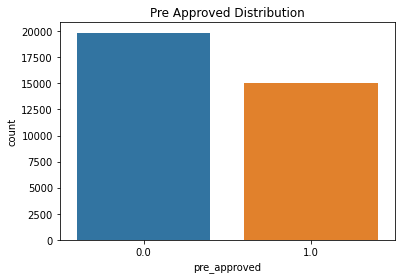

In [ ]:
sns.countplot(x='pre_approved', data=df).set_title('Pre Approved Distribution');

In [ ]:
df = df.query('pre_approved == 1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 7 to 35019
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14999 non-null  int64  
 1   age                   14999 non-null  float64
 2   monthly_income        14999 non-null  float64
 3   collateral_value      14986 non-null  float64
 4   loan_amount           14999 non-null  float64
 5   city                  14991 non-null  object 
 6   state                 14999 non-null  object 
 7   collateral_debt       9692 non-null   float64
 8   verified_restriction  14935 non-null  float64
 9   dishonored_checks     14999 non-null  int64  
 10  expired_debts         14999 non-null  int64  
 11  banking_debts         14999 non-null  int64  
 12  commercial_debts      14999 non-null  int64  
 13  protests              14999 non-null  int64  
 14  marital_status        402 non-null    object 
 15  informed_restrictio

In [ ]:
df.isnull().sum()

id                          0
age                         0
monthly_income              0
collateral_value           13
loan_amount                 0
city                        8
state                       0
collateral_debt          5307
verified_restriction       64
dishonored_checks           0
expired_debts               0
banking_debts               0
commercial_debts            0
protests                    0
marital_status          14597
informed_restriction      806
loan_term               14999
monthly_payment           750
informed_purpose          583
auto_brand                  0
auto_model                  1
auto_year                   0
pre_approved                0
form_completed              0
sent_to_analysis            0
channel                   565
zip_code                    0
landing_page              565
landing_page_product     5705
gender                   1892
utm_term                10225
education_level          2887
dtype: int64

# Exploratory Data Analysis / EDA

Será analisados a contagem das variáveis: gender, sent to analysis e form completed. Também será verificado a distribuição de variáveis com muitos valores distintos, afim de verificar outiliers. 

## Count Analysis

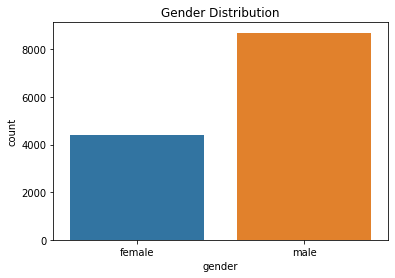

In [ ]:
sns.countplot(x='gender', data=df).set_title('Gender Distribution');

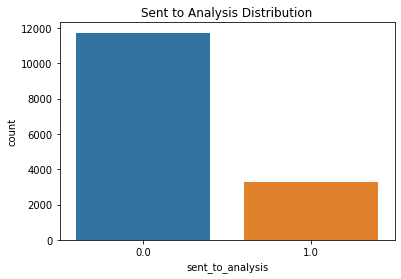

In [ ]:
sns.countplot(x='sent_to_analysis', data=df).set_title('Sent to Analysis Distribution');

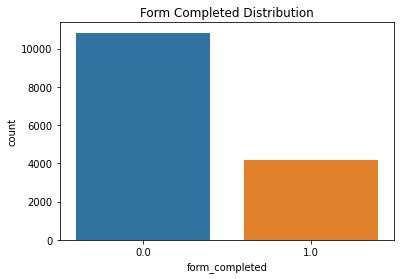

In [ ]:
sns.countplot(x='form_completed', data=df).set_title('Form Completed Distribution');

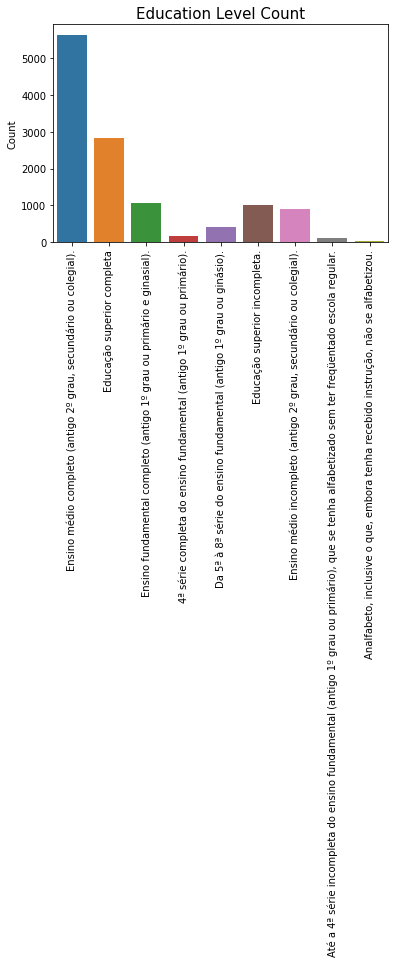

In [ ]:
g = sns.countplot(x='education_level', data=df);
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("", fontsize=5)
g.set_ylabel("Count", fontsize=10)
g.set_title("Education Level Count", fontsize=15);

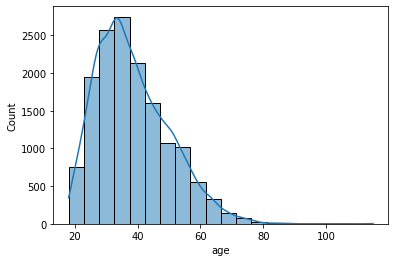

In [ ]:
sns.histplot(data=df, x="age", kde=True, bins=20);

## Exploratoring Outliers

Serão analisadas as distribuições EDA das seguintes variáveis: age, auto_year, monthly_income, collateral_value 

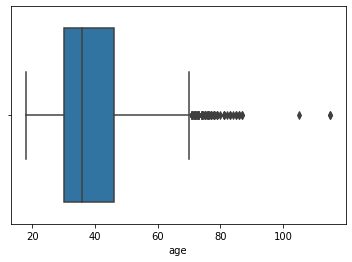

In [ ]:
ax = sns.boxplot(x=df["age"]); 

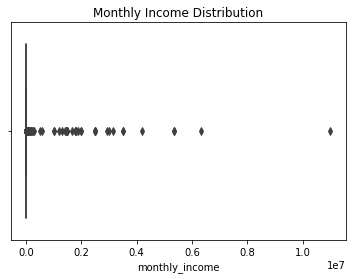

In [ ]:
sns.boxplot(x=df["monthly_income"]).set_title('Monthly Income Distribution'); 

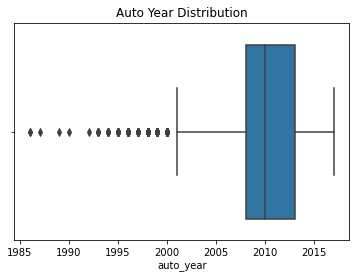

In [ ]:
sns.boxplot(x=df["auto_year"]).set_title('Auto Year Distribution');

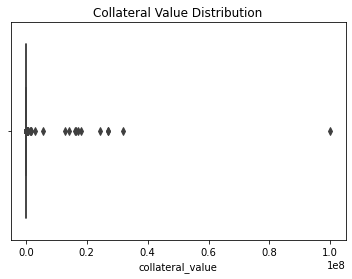

In [ ]:
sns.boxplot(x=df["collateral_value"]).set_title('Collateral Value Distribution');

# Grouping categories

In [ ]:
label_enconder = preprocessing.LabelEncoder()

In [ ]:
df['education_level']= label_enconder.fit_transform(df['education_level'])

## Deleting Collumns

Serão excluidas as colunas marital_status e loan_term devido a ambas possuirem muitos valores nulos.

Será excluída a coluna gender dada que é uma coluna desbalanceada e continuar com ela enviesará o modelo devido ao genero.

In [ ]:
df = df.drop(columns=['marital_status'])

In [ ]:
df = df.drop(columns=['loan_term'])

In [ ]:
df = df.drop(columns=['gender'])

In [ ]:
df = df.drop(columns=['city'])

In [ ]:
df = df.drop(columns=['state'])

In [ ]:
df = df.drop(columns=['informed_purpose'])

In [ ]:
df = df.drop(columns=['auto_brand'])

In [ ]:
df = df.drop(columns=['auto_model'])

In [ ]:
df = df.drop(columns=['channel'])

In [ ]:
df = df.drop(columns=['zip_code'])

In [ ]:
df = df.drop(columns=['landing_page'])

In [ ]:
df = df.drop(columns=['landing_page_product'])

In [ ]:
df = df.drop(columns=['utm_term'])

In [ ]:
df = df.drop(columns=['education_level'])

# Cleaning Data

In [ ]:
for col in df.columns:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [ ]:
df['outlier_age'] = (abs(df['age_zscore'])> 3).astype(int)

In [ ]:
df['outlier_monthly_income'] = (abs(df['monthly_income_zscore'])> 3).astype(int)

In [ ]:
df['outlier_auto_year'] = (abs(df['auto_year_zscore'])> 3).astype(int)

In [ ]:
df['outlier_collateral_value'] = (abs(df['collateral_value_zscore'])> 3).astype(int)

In [ ]:
df.tail()

,id,age,monthly_income,collateral_value,loan_amount,collateral_debt,verified_restriction,dishonored_checks,expired_debts,banking_debts,commercial_debts,protests,informed_restriction,monthly_payment,auto_year,pre_approved,form_completed,sent_to_analysis,id_zscore,age_zscore,monthly_income_zscore,collateral_value_zscore,loan_amount_zscore,collateral_debt_zscore,verified_restriction_zscore,dishonored_checks_zscore,expired_debts_zscore,banking_debts_zscore,commercial_debts_zscore,protests_zscore,informed_restriction_zscore,monthly_payment_zscore,auto_year_zscore,pre_approved_zscore,form_completed_zscore,sent_to_analysis_zscore,outlier_age,outlier_monthly_income,outlier_auto_year,outlier_collateral_value
35012,98339,50.0,1800.0,25000.0,12310.03,NaN,1.0,1,0,0,0,0,1.0,418.46,2014.0,1.0,0.0,0.0,-2.222686,1.003072,-0.059818,-0.024413,-0.168981,NaN,2.462683,7.185268,-0.05171,-0.255332,-0.311802,-0.123963,2.137303,-0.023743,1.203863,NaN,-0.620237,-0.527908,0,0,0,0
35014,98337,50.0,4500.0,20000.0,5000.00,4000.0,1.0,0,0,1,1,1,1.0,169.97,2011.0,1.0,0.0,0.0,-2.222786,1.003072,-0.042272,-0.029477,-0.692599,-0.003634,2.462683,-0.139174,-0.05171,3.916475,3.207168,8.066901,2.137303,-0.037385,0.293454,NaN,-0.620237,-0.527908,0,0,0,0
35016,98335,34.0,850.0,14000.0,5000.00,1000.0,0.0,0,0,0,0,0,0.0,219.33,2010.0,1.0,0.0,0.0,-2.222886,-0.376206,-0.065992,-0.035552,-0.692599,-0.032662,-0.406061,-0.139174,-0.05171,-0.255332,-0.311802,-0.123963,-0.467879,-0.034675,-0.010015,NaN,-0.620237,-0.527908,0,0,0,0
35017,98333,24.0,778.0,26000.0,5320.67,NaN,0.0,0,0,0,0,0,0.0,233.40,2014.0,1.0,0.0,0.0,-2.222986,-1.238254,-0.066460,-0.023401,-0.669629,NaN,-0.406061,-0.139174,-0.05171,-0.255332,-0.311802,-0.123963,-0.467879,-0.033903,1.203863,NaN,-0.620237,-0.527908,0,0,0,0
35019,98327,50.0,3000.0,25000.0,20516.72,NaN,0.0,0,0,0,0,0,0.0,900.00,2007.0,1.0,0.0,0.0,-2.223287,1.003072,-0.052020,-0.024413,0.418865,NaN,-0.406061,-0.139174,-0.05171,-0.255332,-0.311802,-0.123963,-0.467879,0.002694,-0.920424,NaN,-0.620237,-0.527908,0,0,0,0


In [ ]:
print ("Print number of outliers = " +str(df.outlier_age.value_counts()[1]))

Print number of outliers = 75


In [ ]:
df = df.query('outlier_age < 1')

In [ ]:
print ("Print number of outliers = " +str(df.outlier_monthly_income.value_counts()[1]))

Print number of outliers = 33


In [ ]:
df = df.query('outlier_monthly_income < 1')

In [ ]:
print ("Print number of outliers = " +str(df.outlier_auto_year.value_counts()[1]))

Print number of outliers = 168


In [ ]:
df = df.query('outlier_auto_year < 1')

In [ ]:
print ("Print number of outliers = " +str(df.outlier_collateral_value.value_counts()[1]))

Print number of outliers = 10


In [ ]:
df = df.query('outlier_collateral_value < 1')

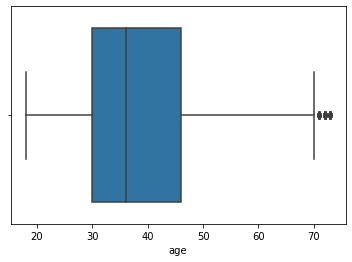

In [ ]:
ax = sns.boxplot(x=df["age"]); 

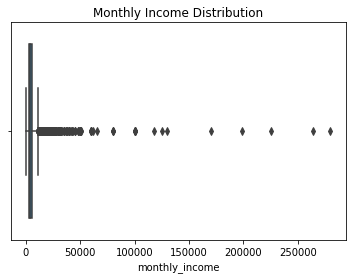

In [ ]:
sns.boxplot(x=df["monthly_income"]).set_title('Monthly Income Distribution'); 

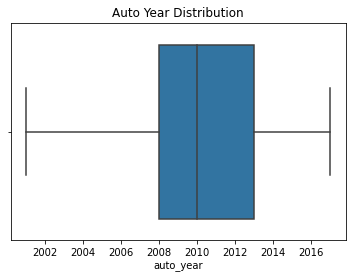

In [ ]:
sns.boxplot(x=df["auto_year"]).set_title('Auto Year Distribution');

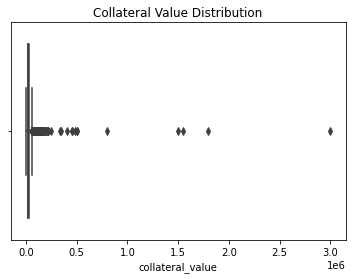

In [ ]:
sns.boxplot(x=df["collateral_value"]).set_title('Collateral Value Distribution');

In [ ]:
df_1 = df.query('monthly_income < 10000')

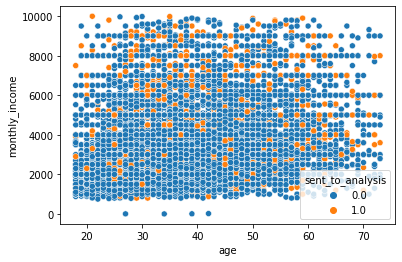

In [ ]:
sns.scatterplot(data=df_1, x="age", y="monthly_income", hue="sent_to_analysis");

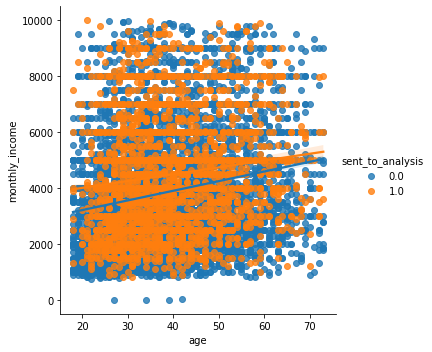

In [ ]:
g = sns.lmplot(x="age", y="monthly_income", hue="sent_to_analysis", data=df_1)